# Ultimate dataset analysis

## Imports

In [1]:
from os.path import isfile, join

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
import seaborn as sns

import common

## Settings

In [2]:
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 10)

## Constants

In [3]:
COLORS = {
    '6': '#7777FF',  # light blue
    '5': '#5555FF',  # blue
    '4': '#FF5555',  # red
    '3': '#FF7777',  # light red
    '0': '#FFFFFF',  # white
    '_': '#333333',  # dark grey
}

## Datasets

In [4]:
datasets = [

    # Guppy
    {'dataset': 'bc3_01', 'caller': 'guppy'},
    {'dataset': 'bc3_02', 'caller': 'guppy'},
    {'dataset': 'bc3_03', 'caller': 'guppy'},
    {'dataset': 'bc6_05', 'caller': 'guppy'},
    {'dataset': 'bc6_06', 'caller': 'guppy'},
    {'dataset': 'bc6_07', 'caller': 'guppy'},
    {'dataset': 'bc6_08', 'caller': 'guppy'},
    {'dataset': 'bc6_09', 'caller': 'guppy'},
    {'dataset': 'bc6_10', 'caller': 'guppy'},
    {'dataset': 'bc6_2_05', 'caller': 'guppy'},
    {'dataset': 'bc6_2_06', 'caller': 'guppy'},
    {'dataset': 'bc6_2_07', 'caller': 'guppy'},
    {'dataset': 'bc6_2_08', 'caller': 'guppy'},
    {'dataset': 'bc6_2_09', 'caller': 'guppy'},
    {'dataset': 'bc6_2_10', 'caller': 'guppy'},
    {'dataset': 'bc7_1_18', 'caller': 'guppy'},
    {'dataset': 'bc7_1_19', 'caller': 'guppy'},
    {'dataset': 'bc7_1_20', 'caller': 'guppy'},
    {'dataset': 'bc7_1_21', 'caller': 'guppy'},
    {'dataset': 'bc7_1_22', 'caller': 'guppy'},
    {'dataset': 'bc7_1_23', 'caller': 'guppy'},
    {'dataset': 'bc7_1_24', 'caller': 'guppy'},
    {'dataset': 'bc7_2_18', 'caller': 'guppy'},
    {'dataset': 'bc7_2_19', 'caller': 'guppy'},
    {'dataset': 'bc7_2_20', 'caller': 'guppy'},
    {'dataset': 'bc7_2_21', 'caller': 'guppy'},
    {'dataset': 'bc7_2_22', 'caller': 'guppy'},
    {'dataset': 'bc7_2_23', 'caller': 'guppy'},
    {'dataset': 'bc7_2_24', 'caller': 'guppy'},
    {'dataset': 'sca8_1_11', 'caller': 'guppy'},
    {'dataset': 'sca8_1_12', 'caller': 'guppy'},
    {'dataset': 'sca8_1_15', 'caller': 'guppy'},
    {'dataset': 'sca8_1_16', 'caller': 'guppy'},
    {'dataset': 'sca8_1_19', 'caller': 'guppy'},
    {'dataset': 'sca8_1_20', 'caller': 'guppy'},
    {'dataset': 'sca8_2_11', 'caller': 'guppy'},
    {'dataset': 'sca8_2_12', 'caller': 'guppy'},
    {'dataset': 'sca8_2_15', 'caller': 'guppy'},
    {'dataset': 'sca8_2_16', 'caller': 'guppy'},
    {'dataset': 'sca8_2_19', 'caller': 'guppy'},
    {'dataset': 'sca8_2_20', 'caller': 'guppy'},

    # Dorado
    {'dataset': 'bc3_01', 'caller': 'dorado'},
    {'dataset': 'bc3_02', 'caller': 'dorado'},
    {'dataset': 'bc3_03', 'caller': 'dorado'},
    {'dataset': 'bc6_05', 'caller': 'dorado'},
    {'dataset': 'bc6_06', 'caller': 'dorado'},
    {'dataset': 'bc6_07', 'caller': 'dorado'},
    {'dataset': 'bc6_08', 'caller': 'dorado'},
    {'dataset': 'bc6_09', 'caller': 'dorado'},
    {'dataset': 'bc6_10', 'caller': 'dorado'},

    # Dorado HAC
    {'dataset': 'bc7_1_18', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_1_19', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_1_20', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_1_21', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_1_22', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_1_23', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_1_24', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_2_18', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_2_19', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_2_20', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_2_21', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_2_22', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_2_23', 'caller': 'dorado_hac'},
    {'dataset': 'bc7_2_24', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_1_11', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_1_12', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_1_15', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_1_16', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_1_19', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_1_20', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_2_11', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_2_12', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_2_15', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_2_16', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_2_19', 'caller': 'dorado_hac'},
    {'dataset': 'sca8_2_20', 'caller': 'dorado_hac'},

    # Dorado SUP
    {'dataset': 'bc7_1_18', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_1_19', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_1_20', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_1_21', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_1_22', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_1_23', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_1_24', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_2_18', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_2_19', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_2_20', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_2_21', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_2_22', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_2_23', 'caller': 'dorado_sup'},
    {'dataset': 'bc7_2_24', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_1_11', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_1_12', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_1_15', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_1_16', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_1_19', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_1_20', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_2_11', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_2_12', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_2_15', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_2_16', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_2_19', 'caller': 'dorado_sup'},
    {'dataset': 'sca8_2_20', 'caller': 'dorado_sup'},
]

# datasets = [
#     {'dataset': 'sca8_2_11', 'caller': 'dorado_sup'},
#     {'dataset': 'sca8_2_12', 'caller': 'dorado_sup'},
#     {'dataset': 'sca8_2_15', 'caller': 'dorado_sup'},
#     {'dataset': 'sca8_2_16', 'caller': 'dorado_sup'},
#     {'dataset': 'sca8_2_19', 'caller': 'dorado_sup'},
#     {'dataset': 'sca8_2_20', 'caller': 'dorado_sup'},
# ]

## Folders

In [5]:
fastq_path = '/opt/data/'
fastq_tsv_path = '/opt/data_out/fastq_tsv/'
ontarget_path = '/opt/data_out/ontarget/'
processed_path = '/opt/data_out/processed/'
images_path = '/opt/data_out/images/'
merged_path = '/opt/data_out/merged/'

## Waterfall functions

In [6]:
def plot_waterfall_processed(df, col_len, col_seq, stretch, grid, output_path):
    width = min(1500, df[col_len].max())
    
    cond = df['direction'] == 'fwd'
    fwd = df[cond][[col_seq, col_len]].sort_values([col_len, col_seq], ascending=[True, True]).reset_index()

    cond = df['direction'] == 'rev'
    rev = df[cond][[col_seq, col_len]].sort_values([col_len, col_seq], ascending=[False, False]).reset_index()

    fwd = list(fwd[col_seq])
    rev = list(rev[col_seq])
    inss = fwd + [width*'I'] + rev

    width = (width)*stretch+stretch
    height = len(inss)
    image = common.Image.new('RGB', (width, height), 'grey')
    draw = common.ImageDraw.Draw(image)
    bottom = 0
    for i, seq in enumerate(inss):
        y = i
        # for j, n in enumerate(reversed(seq)):
        for j, n in enumerate(seq):
            x = j + 1
            N = 'CAG'[j%3]
            if n == N:
                color = 'black'
            else:
                color = common.COLORS[n]
            draw.line([(stretch*x, y), (stretch*x, y+1)], width=stretch, fill=color)

    for i in range(width):
        y = stretch*i+stretch//2
        if i % 3 == 0:
            draw.line([(y, 0), (y, height)], width=grid, fill='#AAAAAA')
    
        if i % 30 == 0:
            draw.line([(y, 0), (y, height)], width=grid, fill='white')

        if i % 300 == 0:
            draw.line([(y, 0), (y, height)], width=grid, fill='black')

    image.save(output_path)


def plot_waterfalls_processed(df, output_path):
    col_seq = 'ins_ext_aln'
    col_len = 'len_' + col_seq

    cond = df[col_len] <= 150
    if len(df[cond]) > 0:
        df_sampled = df[cond].sample(n=1000, replace=True, random_state=42)
        output_path = f'{output_path}.wtrf.50.png'
        plot_waterfall_processed(df_sampled, col_len, col_seq, 15, 2, output_path)

    cond = df[col_len] > 150
    if len(df[cond]) > 0:
        df_sampled = df[cond].sample(n=1000, replace=True, random_state=42)
        output_path = f'{output_path}.wtrf.51.png'
        plot_waterfall_processed(df_sampled, col_len, col_seq, 7, 1, output_path)

## Functions

In [7]:
def prepare_row_for_waterfall(row):
    plt_seq = row['seq']

    if not pd.isna(row['prefix_flank']):
        # print(row['prefix_flank'])
        plt_seq = plt_seq.replace(row['prefix_flank'], '0000000000')
        plt_seq = plt_seq.replace(row['suffix_flank'], '0000000000')
    
    plt_seq = plt_seq.replace('CAGCAG', '666666')
    plt_seq = plt_seq.replace('CTGCTG', '333333')
    plt_seq = plt_seq.replace('CAG', '555')
    plt_seq = plt_seq.replace('CTG', '444')

    plt_seq = plt_seq.replace('A', '_')
    plt_seq = plt_seq.replace('T', '_')
    plt_seq = plt_seq.replace('C', '_')
    plt_seq = plt_seq.replace('G', '_')

    return plt_seq


def prepare_df_for_waterfall(df, sample_size=4000, max_len_seq=2000):
    df['len_seq'] = df['seq'].str.len()
    cond = df['len_seq'] <= max_len_seq
    plt_df = df[cond].sample(sample_size, replace=True)
    plt_df['plt_seq'] = plt_df.apply(prepare_row_for_waterfall, axis=1)
    plt_df['fwd'] = plt_df['plt_seq'].str.count('6')
    plt_df['rev'] = plt_df['plt_seq'].str.count('3')
    plt_df['dir'] = plt_df['fwd'] - plt_df['rev']
    cond = plt_df['dir'] > 0
    plt_df_fwd = plt_df[cond].sort_values(['len_seq', 'seq'])

    cond = plt_df['dir'] <= 0
    plt_df_rev = plt_df[cond].sort_values(['len_seq', 'seq'], ascending=[False, False])
    plt_df = pd.concat([plt_df_fwd, plt_df_rev])

    return plt_df


def plot_waterfall(df, col_len, col_seq, output_path):
    width = df[col_len].max()
    height = len(df)

    inss = list(df[col_seq])

    image = common.Image.new('RGB', (width, height), 'grey')
    draw = common.ImageDraw.Draw(image)
    bottom = 0
    for i, seq in enumerate(inss):
        y = i
        half = len(seq) / 2
        # left = 0
        left = (width - len(seq)) // 2
        # right = width - len(seq)
        for j, n in enumerate(seq):
            color = COLORS[n]
            draw.point([left+j, i], fill=color)
            # if j < half:
            #     draw.point([left+j, i], fill=color)
            # else:
            #     draw.point([right+j, i], fill=color)

    image.save(output_path)


def plot_histogram(df, x, hue, base, output_histogram):
    fig, ax = plt.subplots(figsize=(16, 10))
    gfg = sns.histplot(df, x=x, discrete=True, hue=hue, multiple='stack')
    # gfg.set_xlim(0, 1000)
    # gfg.set_yscale("log")
    loc = plticker.MultipleLocator(base=base)
    gfg.xaxis.set_major_locator(loc)
    gfg.set_xticklabels(gfg.get_xticklabels(), rotation=90)
    fig.savefig(output_histogram)


def plot_histograms(df, x, output_path):
    cond = df[x] <= 50
    if len(df[cond]) > 0:
        plot_histogram(df[cond].sort_values('direction', ascending=False), x, 'direction', 5, f'{output_path}.hist.50.png')
    cond = df[x] > 50
    if len(df[cond]) > 0:
        plot_histogram(df[cond].sort_values('direction', ascending=False), x, 'direction', 5, f'{output_path}.hist.51.png')


def load_fastq_tsv(path):
    df = pd.read_csv(path, sep='\t', header=None)
    df.columns = ['seq', 'id']
    return df


def load_ontarget(path):
    return common.load_tsv(path, common.COLUMNS_PREPARED)


def load_processed(path):
    return common.load_tsv(path)


def load(row):
    dataset = row['dataset']
    caller = row['caller']
    
    path = f'{fastq_tsv_path}{dataset}_{caller}.fastq.tsv'
    df_fastq = load_fastq_tsv(path)
    reads = len(df_fastq)
    
    path = f'{ontarget_path}{dataset}.{caller}.ontarget.tsv'
    df_ontarget = load_ontarget(path)
    ontarget = len(df_ontarget)
    cond = df_ontarget['direction'] == 'fwd'
    ontarget_fwd = len(df_ontarget[cond])
    ontarget_rev = ontarget - ontarget_fwd
    
    # Merge FASTQ and on-target dataframes
    # df = pd.merge(df_fastq, df_ontarget, how="outer", on=["id", "id"])
    # path = f'{merged_path}{dataset}.{caller}.merged.tsv'
    # df.to_csv(path, sep='\t', index=False)
    
    # Waterfall
    # plt_df = prepare_df_for_waterfall(df)
    # output_path = f'{images_path}{dataset}.{caller}.png'
    # plot_waterfall(plt_df, 'len_seq', 'plt_seq', output_path)

    path = f'{processed_path}{dataset}.{caller}.ontarget.processed.tsv'
    df_processed = load_processed(path)
    df_processed['len'] = df_processed['len_ins_ext_aln'] / 3
    cond = df_processed['len'] <= 50
    percentiles_50 = df_processed[cond]['len'].quantile([0.2, 0.5, 0.8])
    cond = df_processed['len'] > 50
    percentiles_51 = df_processed[cond]['len'].quantile([0.2, 0.5, 0.8])

    # Histograms
    # output_path = f'{images_path}{dataset}.{caller}'
    # plot_histograms(df_processed, 'len', output_path)

    # Waterfalls
    # output_path = f'{images_path}{dataset}.{caller}'
    # plot_waterfalls_processed(df_processed, output_path)

    return pd.Series({
        # 'df_fastq': df_fastq,
        # 'df_ontarget': df_ontarget,
        'reads': reads,
        'ontarget': ontarget,
        'ontarget_fwd': ontarget_fwd,
        'ontarget_rev': ontarget_rev,
        '50_20th': percentiles_50[0.2],
        '50_50th': percentiles_50[0.5],
        '50_80th': percentiles_50[0.8],
        '51_20th': percentiles_51[0.2],
        '51_50th': percentiles_51[0.5],
        '51_80th': percentiles_51[0.8],
    })

In [8]:
for d in datasets:
    dataset = d['dataset']
    caller = d['caller']
    
    path = f'{fastq_tsv_path}{dataset}_{caller}.fastq.tsv'
    path = f'{ontarget_path}{dataset}.{caller}.ontarget.tsv'
    path = f'{processed_path}{dataset}.{caller}.ontarget.processed.tsv'

    if not isfile(path):
        print(path)

In [9]:
df = pd.DataFrame(datasets)
df

,dataset,caller
0,bc3_01,guppy
1,bc3_02,guppy
2,bc3_03,guppy
3,bc6_05,guppy
4,bc6_06,guppy
...,...,...
97,sca8_2_12,dorado_sup
98,sca8_2_15,dorado_sup
99,sca8_2_16,dorado_sup
100,sca8_2_19,dorado_sup


In [10]:
df = pd.concat([df, df.apply(load, axis=1)], axis=1)

In [11]:
df

,dataset,caller,reads,ontarget,ontarget_fwd,ontarget_rev,50_20th,50_50th,50_80th,51_20th,51_50th,51_80th
0,bc3_01,guppy,95490.0,69287.0,36729.0,32558.0,15.0,15.0,41.0,72.0,105.0,143.0
1,bc3_02,guppy,212845.0,150981.0,86653.0,64328.0,12.0,13.0,13.0,92.0,100.0,111.0
2,bc3_03,guppy,202022.0,144319.0,86630.0,57689.0,12.0,13.0,13.0,129.0,143.0,179.0
3,bc6_05,guppy,29706.0,10357.0,5540.0,4817.0,5.0,5.0,5.0,269.4,331.5,461.2
4,bc6_06,guppy,26702.0,5914.0,3153.0,2761.0,5.0,5.0,5.0,167.4,246.0,351.0
...,...,...,...,...,...,...,...,...,...,...,...,...
97,sca8_2_12,dorado_sup,21426.0,15680.0,12505.0,3175.0,22.0,23.0,23.0,116.0,119.0,120.0
98,sca8_2_15,dorado_sup,11348.0,7473.0,6992.0,481.0,25.0,26.0,26.0,81.0,84.0,86.0
99,sca8_2_16,dorado_sup,60934.0,51318.0,41372.0,9946.0,24.0,25.0,25.0,117.0,120.0,122.0
100,sca8_2_19,dorado_sup,18424.0,13630.0,12582.0,1048.0,24.0,25.0,25.0,115.0,118.0,119.0


In [12]:
# output_path = '/opt/data_out/datasets_overview.tsv'
# df.to_csv(output_path, sep='\t', index=False)

## Tryouts

In [13]:
stop

NameError: name 'stop' is not defined

In [14]:
df = pd.read_csv('/opt/data_out/merged/bc3_01.guppy.merged.tsv', sep='\t')

In [15]:
cond = df['direction'].notnull()
df = df[cond]

In [16]:
def chop(row):
    idx = row['seq'].find(row['prefix_flank'])
    prefix = row['seq'][:idx]
    idx = row['seq'].find(row['suffix_flank'])
    suffix = row['seq'][idx+10:]

    return pd.Series({
        'prefix': prefix,
        'suffix': suffix,
    })

In [17]:
df = pd.concat([df, df.apply(chop, axis=1)], axis=1)

In [18]:
df

,seq,id,direction,prefix_flank,ins,suffix_flank,prefix_flank_q,ins_q,suffix_flank_q,prefix,suffix
0,ATGTTAGTCTGCTTCGTTCAGCATATTGCTAAGGTTAACACAAAGA...,@a3a07401-0c29-4524-84bb-87f892e9214c,fwd,ATGATGCCCC,AGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCA,GCAGCATCCC,"'(,.31008<",<BD?<<IMIOJI{Z{RFQHEFMLJFGD888333*))*+:0,//...14))=,ATGTTAGTCTGCTTCGTTCAGCATATTGCTAAGGTTAACACAAAGA...,GGCCACAAGGACCCTTCGAGCCCGTTCGCCGGCCGCGGACCCGGCC...
1,TTTGTCGCCTGTACTCGTTCAGTTACGTATTGCTAAGGTTAACACA...,@f9d2e32d-c3c2-46fe-8bb5-5b51763ea464,rev,GCCGGGAATG,CTGCTGCTGCTGCTGCTGCTGCTGCTGCTGCTGCTGCTGCTGC,TGGGGGGATC,66322?D?>>,"BEEDEEDEJ>==@DFSICCDDEGFOKFBCCEHSFB@@@B,,,,",@?=>DD>;7-,TTTGTCGCCTGTACTCGTTCAGTTACGTATTGCTAAGGTTAACACA...,ACAGACCGTCTTCTTTTGGCCAGGCTGAGGCCCTGACGTGGATGGG...
2,CTGTCCTCTGCTTCGTTCAGTTACGTATTGCTAAGGTTAACACAAA...,@35f410e8-8857-44bd-8a83-8f3222bd0aa5,rev,GCCGGAGATG,CTGCTGCTGCTGCTGCTGCTGCTGCTGCTGCTGC,TGCTGGGGGG,---.1(2''',5886999FCCDC@AABBFDIFHFGIM{GDKGGHD,ECF@5339=5,CTGTCCTCTGCTTCGTTCAGTTACGTATTGCTAAGGTTAACACAAA...,ATCACAGACCATTTCTTTCTTTCGGCAGAGGCTGGAGGCCCTGGTG...
3,ATGTTAACCTACTTCGTTCAGTTACGTATTGCTAAGGTTAACACAA...,@7cde5514-b49f-4670-be6c-fdc6af4c362d,fwd,GTGATCCCCC,AGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGC,AGCAGCATTC,EHGFFG{L{I,J{JGI{JJQK{HP{IE{EHKVBDBBFDEQHG{{@??@D{,4445899F;8,ATGTTAACCTACTTCGTTCAGTTACGTATTGCTAAGGTTAACACAA...,CCGGCTACAAGGACCCTTCGAGCCCCGTTCGCCGGCCGCGGACCCG...
4,TGCCTGTTCTTTCGTTCAGTTACGTATTGCTAAGGTTAACACAAAG...,@27b05f03-2f63-41e0-b983-caf964119a77,rev,GCCGGGAATG,CTGCTGCTGCTGCTGCTGCTGCTGCTGCTGCTGCTGCTGCT,GCTGGGGGGA,7:;?LE{{JG,FJP{MGB<:;@=<::<ECCIFFGLIHJ{HI{NA>ECLOINR,JH{KCBJS??,TGCCTGTTCTTTCGTTCAGTTACGTATTGCTAAGGTTAACACAAAG...,TCACCAGACCATTTCTTTCTTTTGGCCAGGCTGAGGCCCTGAGCGT...
...,...,...,...,...,...,...,...,...,...,...,...
95481,TTATGTGCCTTCGTTCAGTTACGTATTGCTAAGGTTAACACAAAGA...,@ef6d9a18-689a-4117-b8eb-b6171e1f8a1e,fwd,GTGATCCCCC,AGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGC,AGCAGCATTC,ABC@A6762>,BIOGHQH{HGHRDGFF{ODDEFMLJGFMFW{GLQ{{I{K,EKGCDCDEAA,TTATGTGCCTTCGTTCAGTTACGTATTGCTAAGGTTAACACAAAGA...,CCGGCTACAAGGACCCTTCGAGCCCCGTTCGCCGGCCGCGGACCCG...
95485,GTTTTGTACCTCGTTCAGTTACGTATTGCTAAGGTTAACACAAAGA...,@9916c3db-8c7a-4817-ac37-0bdceb857597,fwd,GTGATCCCCC,AGCAGCAGCAGCAGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCA...,AGCAGCATTC,BC??@;=<DG,EKQKGFHFHEJEDFC@@@:==>DDCFDHJHJQINSJ{FJ{G{L{MK...,><<<=<=CE@,GTTTTGTACCTCGTTCAGTTACGTATTGCTAAGGTTAACACAAAGA...,CCGGCTACAAGGACCCTTCGAGCCCCGTTCGCCGGCCGCGGACCCG...
95486,TTTGTGGCTACTCGTTGAGTTACGTATTGCTAAGGTTAACACAAAG...,@f3d5d54f-c47e-4bd3-9534-8e4dd3d33b0a,fwd,GTGATCCCCC,AGCAGCAGCAGCAGCAGCGGCAGCGGCAGCGGCAGCGGCAGCGGCG...,AGCAGCATTC,50)(2100/7,7DEFGDE{MLKMMLJMJOK{JKQ{LXR<;;3445A?:::89621/'...,'''&''..*(,TTTGTGGCTACTCGTTGAGTTACGTATTGCTAAGGTTAACACAAAG...,CCGGCTACAAGGACCCTTCGAGCCCCGTTCGCCGGCCGCGGACCCG...
95487,ATGTCCTGTACTTCGTTCAGTTACGTATTGCTAAGGTTAACACAAA...,@b26d9a3c-dd18-4ccb-9581-73196b2d820d,fwd,GTGATCCCCA,GCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGC,AGCAGCATTC,"442,-..1EA",BE;;;::::;;9;;:;:33215678:899767=?CFFH,CCCACCDD<:,ATGTCCTGTACTTCGTTCAGTTACGTATTGCTAAGGTTAACACAAA...,CCGGCTACAAGGACCCTTCGAGCCCCGTTCGCCGGCCGCGGACCCG...


In [19]:
df['len_prefix'] = df['prefix'].str.len()

In [20]:
df['len_suffix'] = df['suffix'].str.len()

In [21]:
df['len_prefix'].quantile([0.25, 0.5, 0.75])

0.25    391.0
0.50    395.0
0.75    399.0
Name: len_prefix, dtype: float64

In [22]:
df['len_suffix'].quantile([0.25, 0.5, 0.75])

0.25    324.0
0.50    374.0
0.75    381.0
Name: len_suffix, dtype: float64

In [29]:
cond = df['direction'] == 'rev'

In [31]:
df[cond]['len_prefix'].quantile([0.25, 0.5, 0.75])
# len(df[cond])

0.25    392.0
0.50    396.0
0.75    399.0
Name: len_prefix, dtype: float64

In [32]:
def count_kmers(seq):
    len_kmer = 11
    kmers = {}
    
    for i in range(len(seq) - len_kmer + 1):
        kmer = seq[i:i+len_kmer]
        if kmer in kmers:
            kmers[kmer] += 1
        else:
            kmers[kmer] = 1

    return {k: kmers[k] for k in kmers if kmers[k] == 1}

In [33]:
# kmers = df[cond].apply(lambda x: count_kmers(x['prefix'][280:380]), axis=1)
kmers = df[cond].apply(lambda x: count_kmers(x['suffix'][-360:-260]), axis=1)

In [34]:
from collections import Counter

merged_dict = Counter()

for k in kmers:
    merged_dict.update(k)

In [35]:
len(merged_dict)

97268

In [36]:
top_5 = sorted(merged_dict.items(), key=lambda x: x[1], reverse=True)[:5]

In [37]:
top_5

[('GCTGAGGCCCT', 27342),
 ('CTGAGGCCCTG', 27172),
 ('TGAGGCCCTGA', 26938),
 ('CGTGGATGGGC', 26929),
 ('GGCTGAGGCCC', 26561)]

In [39]:
fwd_prefix = 'CACGGACGGCC'
fwd_suffix = 'TCGCCGGCCGC'
rev_prefix = 'TCCTGTGATCC'
rev_suffix = 'GCTGAGGCCCT'

In [ ]:
# sns.scatterplot(df, x='len_prefix', y='len_suffix', hue='direction')

In [ ]:
# df['len_prefix'].hist(bins=100)

In [ ]:
# df['len_suffix'].hist(bins=100)

In [ ]:
'ABCDE'[-3:-1]

In [38]:
dfm = pd.read_csv('/opt/data_out/merged/bc3_01.guppy.merged.tsv', sep='\t')

In [40]:
cond_fwd_prefix = dfm['seq'].str.find(fwd_prefix) != -1
cond_fwd_suffix = dfm['seq'].str.find(fwd_suffix) != -1
cond_dir = dfm['direction'].isnull()
sum(cond_fwd_prefix & cond_fwd_suffix & cond_dir)
# df

2754

In [ ]:
cond = df['direction'] == 'fwd'
sum(cond)

<Axes: >

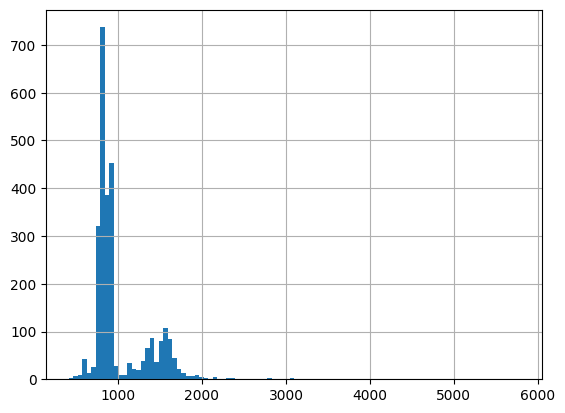

In [42]:
dfm['len_seq'] = dfm['seq'].str.len()
dfm[cond_fwd_prefix & cond_fwd_suffix & cond_dir]['len_seq'].hist(bins=100)

In [46]:
# dfm['seq'].str.find(fwd_prefix).hist(bins=100)
dfm['seq'].str.find(rev_prefix)

0         -1
1         -1
2        311
3         -1
4        310
        ... 
95485     -1
95486     -1
95487     -1
95488     -1
95489     -1
Name: seq, Length: 95490, dtype: int64